<h1><center> Semantic Networks of Social Media Data</center></h1>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import re
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import tweepy
import datetime
import time
import csv
from sklearn.feature_extraction.text import CountVectorizer


## scraping tweets
 * Defining a functionn to scrape the most recent tweets from multiple accouts.
 * For each tweet, `id`,`created_at`,`full_text`,`user.screen_name` are picked.
 * If it's a retweet, grab full text from the original tweet
 * Made a dataframe and return the dataframe.
 * Used the function to get the original tweets published by a list of accounts. 


In [2]:
consumer_key = "uuEFDzWjgsyQA69qe88B8lY41"
consumer_secret = "aw925nTiWZQiCl8wAmlFgvunZF2iqI1DbBpt7yBbfpkUYuK1u3"
access_token = "1616128416582975506-tzsxTyHWkddwkSZvKW5O6BpRu3GzTA"
access_token_secret = "qP2Rqyw1VXSJEHnKTPxW5ybNcfj9C6FfB3BycaKgc5odS"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [3]:
import requests
import os
import json
bearer_token='AAAAAAAAAAAAAAAAAAAAAMtFlQEAAAAAj1Kpku0MIk5Diilf9xrrBnnssnI%3Dhl3adpgw0EaupDkT4ODfYvGCLtFsfNwe3kCEw4mWHl7yDvnoWS'


def create_url(usernames):
    s=','.join(usernames)
    usernames = "usernames="+s
    user_fields = "user.fields=id,created_at"
    url = "https://api.twitter.com/2/users/by?{}&{}".format(usernames, user_fields)
    return url


def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """

    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2UserTweetsPython"
    return r


def connect_to_endpoint(url):
    response = requests.request("GET", url, auth=bearer_oauth,)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(
            "Request returned an error: {} {}".format(
                response.status_code, response.text
            )
        )
    return response.json()

In [7]:
def get_all_tweets(user_names):
    url = create_url(user_names)
    print(url)
    json_response = connect_to_endpoint(url)
    response_dict=json_response['data']
    id_list=[]
    id_user={}
    print(id_user)
    
    for i in response_dict:
        id_list.append(i['id'])
        id_user[i['id']]=i['name']
    tweets_dict={}
    
    for i in id_list:
        url="https://api.twitter.com/2/users/{}/tweets".format(i)
        params={'max_results':100,'tweet.fields': 'id,text,created_at'}
        temp=[]
        response=requests.request("GET", url, auth=bearer_oauth,params=params).json()
        temp.append(response)
        tweets_dict[i]=temp
    data=[]
    for i in tweets_dict.keys():
        texts=tweets_dict[i][0]['data']
        for j in range(0,100):
            temp=texts[j]
            ls=[temp['id'],temp['created_at'],id_user[i],temp['text']]
            data.append(ls)
    
    df=pd.DataFrame(data)    
    return df


In [23]:
# we use some examples of news outlets in this study: 
# https://www.researchgate.net/profile/Matthew-Miles-2/publication/357193810_Does_the_Ideology_of_the_Newsroom_Affect_the_Provision_of_Media_Slant/links/62ea8ddf88b83e7320a67270/Does-the-Ideology-of-the-Newsroom-Affect-the-Provision-of-Media-Slant.pdf
# use your function to scrape the tweets for the following accounts and compile a corpus

media1=['foxnews','dcexaminer','breitbartnews']
media1_corpus=get_all_tweets(media1)
media1_corpus

https://api.twitter.com/2/users/by?usernames=foxnews,dcexaminer,breitbartnews&user.fields=id,created_at
200
{}


,0,1,2,3
0,1635396601115037697,2023-03-13T21:45:08.000Z,Fox News,Tiger Woods' lawyers dismiss Erica Herman's se...
1,1635395353909313538,2023-03-13T21:40:11.000Z,Fox News,"Prince William, Kate Middleton’s marriage seem..."
2,1635395271847813121,2023-03-13T21:39:51.000Z,Fox News,"BREAKING: AOC, top Democrats issue stinging re..."
3,1635394071052124161,2023-03-13T21:35:05.000Z,Fox News,CNBC's Jim Cramer eviscerated for touting Sili...
4,1635392809011167232,2023-03-13T21:30:04.000Z,Fox News,Brothers in Jussie Smollett hoax break silence...
...,...,...,...,...
295,1634620788350369793,2023-03-11T18:22:20.000Z,Breitbart News,Treasury Secretary Janet Yellen on Friday conv...
296,1634616657145462786,2023-03-11T18:05:55.000Z,Breitbart News,The CEO of Silicon Valley Bank (SVB) sold $3.5...
297,1634612445535784966,2023-03-11T17:49:11.000Z,Breitbart News,A school district in Colorado hired a self-pro...
298,1634607555316948992,2023-03-11T17:29:45.000Z,Breitbart News,Hochul and James asked the pharmacies to “comm...


In [8]:
# use your function to scrape the tweets for the following accounts and compile another corpus

media2=['cnn','nytimes','msnbc']
media2_corpus=get_all_tweets(media2)
media2_corpus

https://api.twitter.com/2/users/by?usernames=cnn,nytimes,msnbc&user.fields=id,created_at
200
{}


,0,1,2,3
0,1635385311474642945,2023-03-13T21:00:16.000Z,CNN,Philadelphia Eagles center Jason Kelce has emp...
1,1635381508167827461,2023-03-13T20:45:10.000Z,CNN,The Nigerian musician and producer debuted one...
2,1635378983318503429,2023-03-13T20:35:08.000Z,CNN,Chinese companies are hiring AI employees http...
3,1635373976149979137,2023-03-13T20:15:14.000Z,CNN,Join @AdamSandler and special guests for a nig...
4,1635370216703115265,2023-03-13T20:00:18.000Z,CNN,Reported hate crimes in the US increased 11.6%...
...,...,...,...,...
295,1634501937461702656,2023-03-11T10:30:04.000Z,MSNBC,The House “weaponization” committee is chasing...
296,1634486835396198400,2023-03-11T09:30:03.000Z,MSNBC,"Rep. Judy Chu: Outrageous, disgusting, and abs..."
297,1634471737726205954,2023-03-11T08:30:03.000Z,MSNBC,Russia’s influence over police in the U.S. cou...
298,1634464272574021632,2023-03-11T08:00:24.000Z,MSNBC,Hayes Brown: This CPAC speech made it clear th...


## Building semantic networks
* Getting a subset of tweets that contain the keyword "ChatGPT" for the two sets of documents, ignore case
* Cleaning the tweets to remove accounts and links
* Defining a function to build a semantic network for each set of cleaned documents, returning that network 
    - only using words that have at least appeared in two documents
    - removing stop words
    - only getting the top 50 features
    - use the cooccurrence matrix (dichotomizing the matrix so that values larger than 1 will be set as 1) to build the semantic network
    - make node size proportional to the **eigenvector centrality** of words

In [20]:
# clean the tweets
def clean_tweet(x):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(http://\S+|https://\S+)", " ", x).split())

In [190]:
df1=pd.DataFrame()
df2=pd.DataFrame()



df1=pd.read_csv('media1.csv',sep='delimiter', header=None)

df2=pd.read_csv('media2.csv',sep='delimiter', header=None)

def clean_df(df):
    res=[]
    for i in range(1,len(df[0])):
        temp=df[0][i].split('\t')
        res.append(temp)
    df=pd.DataFrame(res,columns=['index','id','created_at','name','text'])
    return df

df1=clean_df(df1)
df2=clean_df(df2)
df1 = df1.drop('index', axis=1)
df2 = df2.drop('index', axis=1)


text=list(df1['text'])
clean_text=[]
for i in range(0,len(text)):
    if text[i]!=None:
        clean_text.append(clean_tweet(text[i]))
    else:
        clean_text.append('None')

text2=list(df2['text'])
clean_text2=[]
for i in range(0,len(text2)):
    if text2[i]!=None:
        clean_text2.append(clean_tweet(text2[i]))
    else:
        clean_text2.append('None')


df1['text']=clean_text[:len(df1['text'])]
df2['text']=clean_text2[:len(df2['text'])]


df1.to_csv('media_1.csv')
df2.to_csv('media_2.csv')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18088\1260725671.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df1=pd.read_csv('media1.csv',sep='delimiter', header=None)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_18088\1260725671.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2=pd.read_csv('media2.csv',sep='delimiter', header=None)


In [191]:

df1=pd.read_csv('media_1.csv')

df2=pd.read_csv('media_2.csv')


In [192]:
df1.drop(columns=df1.columns[0], axis=1, inplace=True) # removing index column
df1.head()

,id,created_at,name,text
0,1.635322e+18,2023-03-13 16:50:04+00:00,Fox News,Kamala Harris won t speak to Elizabeth Warren ...
1,1.635322e+18,2023-03-13 16:50:04+00:00,Fox News,Chris Beard expected to take Ole Miss job week...
2,1.635320e+18,2023-03-13 16:40:07+00:00,Fox News,Brittany Mahomes reflects on wild first year o...
3,1.635319e+18,2023-03-13 16:36:03+00:00,Fox News,Wheel of Fortune host Pat Sajak apologizes to ...
4,1.635317e+18,2023-03-13 16:30:08+00:00,Fox News,Shark Tank s Kevin O Leary rips Biden over Sil...


In [193]:
df2.drop(columns=df2.columns[0], axis=1, inplace=True)
df2.head()

,id,created_at,name,text
0,1.635325e+18,2023-03-13 17:00:40+00:00,CNN,It is said that a grandma knows best Scottie S...
1,1.635321e+18,2023-03-13 16:45:07+00:00,CNN,There s no getting away from the success that ...
2,1.635317e+18,2023-03-13 16:29:05+00:00,CNN,Jamie Lee Curtis has won her first Oscar going...
3,1.635314e+18,2023-03-13 16:15:08+00:00,CNN,After holding talks with the New York Jets it ...
4,1.635310e+18,2023-03-13 16:02:57+00:00,CNN,Flavonols help to keep your brain sharp But wh...


In [281]:
# get a subset of tweets
keyword='ChatGPT'
corpus1=[]
for i in range(0,len(df1)):
    t=df1.iloc[i]['text']
    temp=t.split(' ')
    if keyword in temp:
        corpus1.append(df1.iloc[i])

corpus2=[]
for i in range(0,len(df2)):
    t=df2.iloc[i]['text']
    temp=t.split(' ')
    if keyword in temp:
        corpus2.append(df2.iloc[i])


In [284]:
data1=pd.DataFrame(corpus1)
data2=pd.DataFrame(corpus2)

In [298]:
len(data2)

13

In [295]:
data2.head(10)

,id,created_at,name,text
603,1.633324e+18,2023-03-08 04:30:06+00:00,CNN,Next time you re wondering how to respond to a...
1291,1.631218e+18,2023-03-02 09:00:22+00:00,CNN,OpenAI is opening up access to its ChatGPT too...
2039,1.628725e+18,2023-02-23 11:54:49+00:00,CNN,Several popular Chinese apps have removed acce...
2103,1.628493e+18,2023-02-22 20:31:04+00:00,CNN,JPMorgan Chase is temporarily clamping down on...
3472,1.623736e+18,2023-02-09 17:30:14+00:00,CNN,Alibaba says it will launch its own ChatGPT st...
6213,1.626662e+18,2023-02-17 19:15:06+00:00,The New York Times,RT OpenAI is experimenting with embedding a wa...
6220,1.626655e+18,2023-02-17 18:50:06+00:00,The New York Times,A I software like ChatGPT then chooses a word ...
6238,1.626612e+18,2023-02-17 16:00:14+00:00,The New York Times,Spotting AI generated text is becoming more di...
6255,1.626530e+18,2023-02-17 10:31:05+00:00,The New York Times,Microsoft an icon of American technology helpe...
7062,1.624087e+18,2023-02-10 16:45:07+00:00,The New York Times,The A I arms race is on Microsoft s release of...


In [296]:
data1.head(10)

,id,created_at,name,text
462,1.634325e+18,2023-03-10 22:45:05+00:00,Fox News,says more schools should ban ChatGPT
2838,1.630638e+18,2023-02-28 18:35:03+00:00,Fox News,Don t fall for these fake malware producing Ch...
5494,1.631241e+18,2023-03-02 10:33:51+00:00,Washington Examiner,The development of the ChatGPT app has led to ...
5498,1.631230e+18,2023-03-02 09:50:29+00:00,Washington Examiner,The development of the ChatGPT app has led to ...
5701,1.630878e+18,2023-03-01 10:28:21+00:00,Washington Examiner,ChatGPT is ominous but the pen is mightier
5717,1.630843e+18,2023-03-01 08:12:44+00:00,Washington Examiner,The development of the ChatGPT app has led to ...
6194,1.629764e+18,2023-02-26 08:42:27+00:00,Washington Examiner,ChatGPT is ominous but the pen is mightier
6336,1.629421e+18,2023-02-25 09:58:27+00:00,Washington Examiner,ChatGPT is ominous but the pen is mightier
6452,1.629207e+18,2023-02-24 19:48:21+00:00,Washington Examiner,ChatGPT is ominous but the pen is mightier
7144,1.634730e+18,2023-03-12 01:36:48+00:00,Breitbart News,The co founder of OpenAI the company behind AI...


13

In [237]:
# build the function to analyze semantic network

def build_semantic_network(x):
    X = vectorizer.fit_transform(x)
    
    #vectorizer.vocabulary_
    feature_names = vectorizer.get_feature_names()
    
    # get the feature to feature co-occurrence matrix
    co = (X.T * X) # this is co-occurrence matrix in sparse csr format
    co.setdiag(0) # sometimes you want to fill same word cooccurence to 0
    print(co.todense()) # print out matrix in dense format

    # select a threshold to reduce the density of the network
    threshold=5
    #co_matrix = np.where(co.todense()>threshold, 1, 0)
    co_matrix=co.todense()
    print(co_matrix)
    
    G = nx.DiGraph(co_matrix, create_using=nx.Graph()) # creating from adjacency matrix 
    node_name = dict(zip(range(0,len(list(G.nodes()))),feature_names))  
    G = nx.relabel_nodes(G, node_name) 
    
    # Take a look
    figure(figsize=(20,20), dpi=100)

    # node size proportional to degree
    node_size= [x*1000 for x in nx.degree_centrality(G).values()]

    # choose a layout function
    pos=nx.spring_layout(G)

    # edge color
    edge_color='0.8'

    nx.drawing.nx_pylab.draw_networkx(G,node_size=node_size, 
                                  pos=pos,
                                  edge_color=edge_color,
                                  with_labels=True,
                                 font_size=12)
    plt.title('The semantic network of news outlet discourse on ChatGPT')
    plt.axis("off") 
    plt.show()
   
    return G

C:\Users\lenovo\.conda\envs\gpuTF\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 3]
 [0 1 0 ... 0 2 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 [0 3 1 ... 0 0 0]]
[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 3]
 [0 1 0 ... 0 2 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 [0 3 1 ... 0 0 0]]


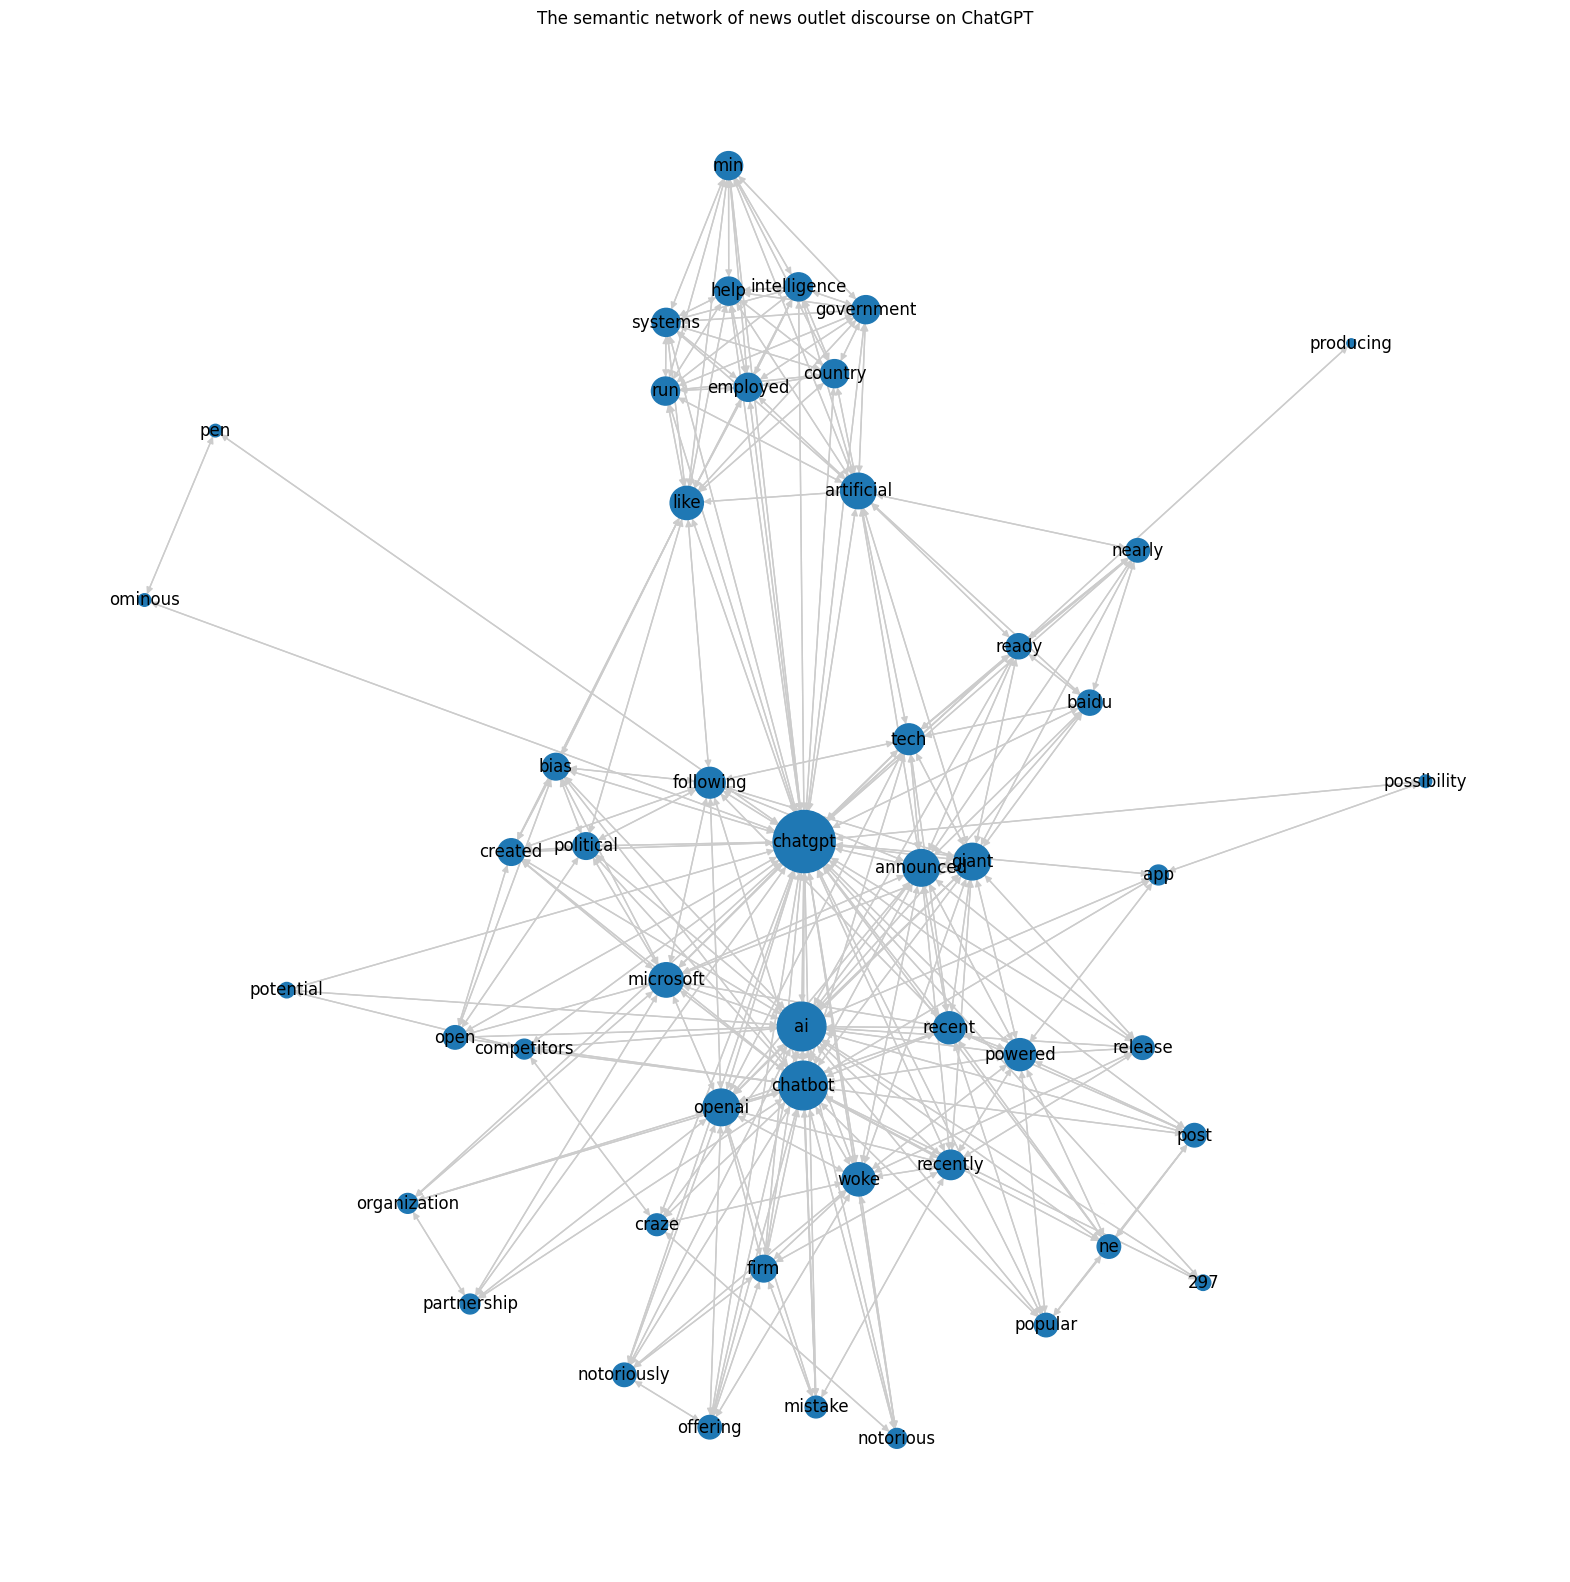

In [289]:
# use your function for the first corpus
G1=build_semantic_network(set(data1['text']))

In [290]:
x1=nx.in_degree_centrality(G1)
{k: v for k, v in sorted(x1.items(), key=lambda item: item[1],reverse=True)}

{'chatgpt': 0.9999999999999999,
 'ai': 0.6122448979591836,
 'chatbot': 0.6122448979591836,
 'announced': 0.3469387755102041,
 'giant': 0.3469387755102041,
 'openai': 0.3469387755102041,
 'artificial': 0.32653061224489793,
 'microsoft': 0.3061224489795918,
 'like': 0.2857142857142857,
 'woke': 0.2857142857142857,
 'powered': 0.26530612244897955,
 'recent': 0.26530612244897955,
 'following': 0.24489795918367346,
 'tech': 0.24489795918367346,
 'recently': 0.22448979591836732,
 'country': 0.2040816326530612,
 'employed': 0.2040816326530612,
 'government': 0.2040816326530612,
 'help': 0.2040816326530612,
 'intelligence': 0.2040816326530612,
 'min': 0.2040816326530612,
 'run': 0.2040816326530612,
 'systems': 0.2040816326530612,
 'bias': 0.18367346938775508,
 'created': 0.18367346938775508,
 'firm': 0.18367346938775508,
 'political': 0.18367346938775508,
 'baidu': 0.16326530612244897,
 'ready': 0.16326530612244897,
 'ne': 0.14285714285714285,
 'nearly': 0.14285714285714285,
 'notoriously': 0.

[[0 0 0 ... 0 0 1]
 [0 0 1 ... 1 0 0]
 [0 1 0 ... 1 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 1]
 [0 0 1 ... 1 0 0]
 [0 1 0 ... 1 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


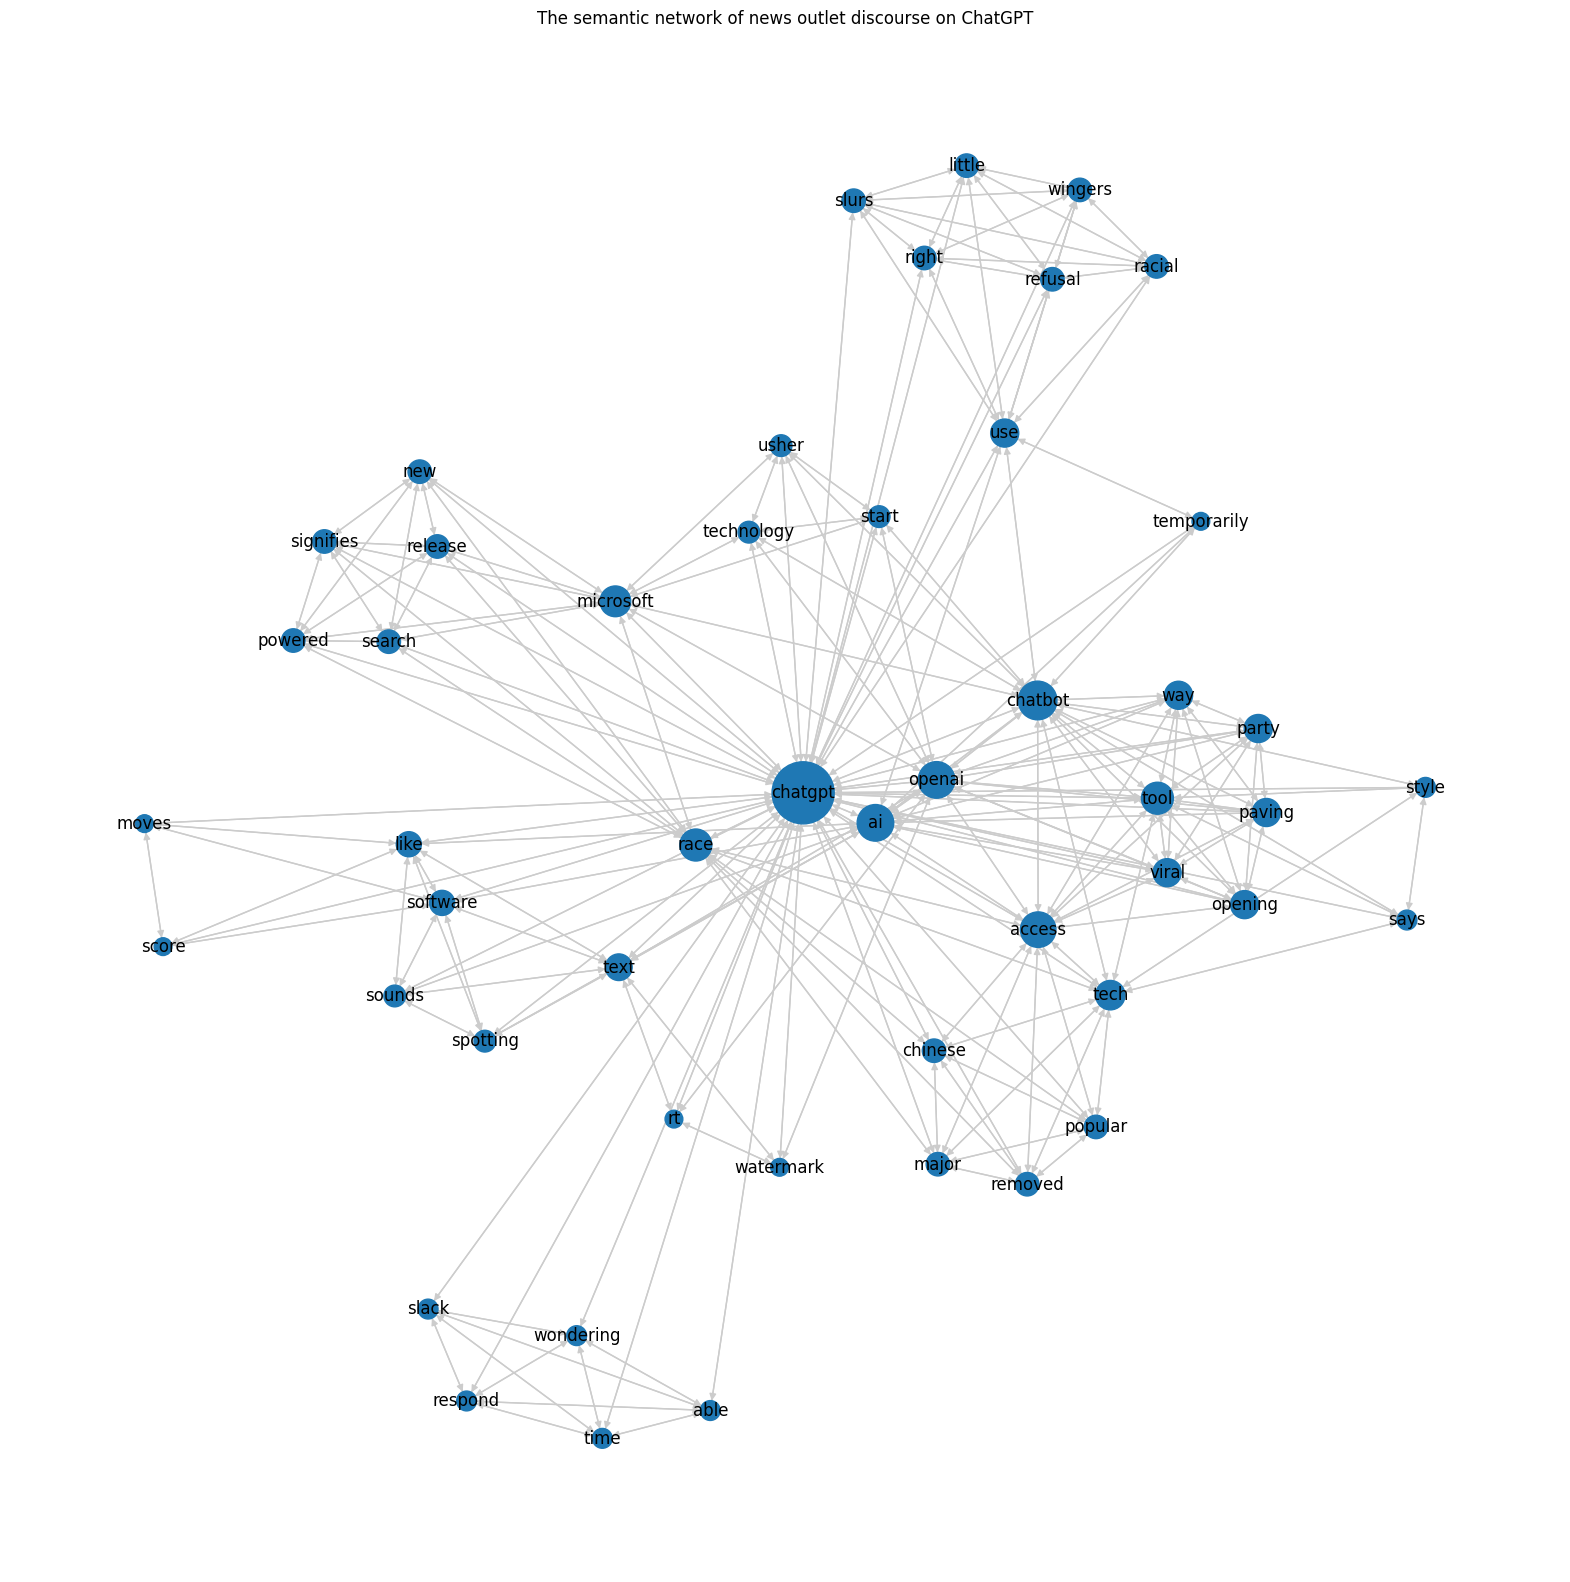

In [291]:
# use your function for the second corpus
G2=build_semantic_network(set(data2["text"]))

In [292]:
x2=nx.in_degree_centrality(G2)
{k: v for k, v in sorted(x2.items(), key=lambda item: item[1],reverse=True)}

{'chatgpt': 0.9999999999999999,
 'chatbot': 0.3877551020408163,
 'ai': 0.3469387755102041,
 'openai': 0.3469387755102041,
 'access': 0.32653061224489793,
 'race': 0.26530612244897955,
 'tool': 0.26530612244897955,
 'microsoft': 0.24489795918367346,
 'tech': 0.22448979591836732,
 'opening': 0.2040816326530612,
 'party': 0.2040816326530612,
 'paving': 0.2040816326530612,
 'use': 0.2040816326530612,
 'viral': 0.2040816326530612,
 'way': 0.2040816326530612,
 'text': 0.18367346938775508,
 'like': 0.16326530612244897,
 'software': 0.16326530612244897,
 'chinese': 0.14285714285714285,
 'little': 0.14285714285714285,
 'major': 0.14285714285714285,
 'new': 0.14285714285714285,
 'popular': 0.14285714285714285,
 'powered': 0.14285714285714285,
 'racial': 0.14285714285714285,
 'refusal': 0.14285714285714285,
 'release': 0.14285714285714285,
 'removed': 0.14285714285714285,
 'right': 0.14285714285714285,
 'search': 0.14285714285714285,
 'signifies': 0.14285714285714285,
 'slurs': 0.1428571428571428

Since eigenvector centrality is proportional to sum of neighbour's centrality and node size is proportional to degree of node, In both cases the central nodes are larger than distant nodes.Also,Semantic network analysis also reveals meaning by the relationships among the terms. The degree centrality for 'chatGPT' is highest in both networks.